# 可视化分析

Correlation Matrix:
                       Pet Count  Output Value  Export Value  Market Size  \
Pet Count               1.000000      0.945365     -0.587632     0.995660   
Output Value            0.945365      1.000000     -0.433182     0.955426   
Export Value           -0.587632     -0.433182      1.000000    -0.511218   
Market Size             0.995660      0.955426     -0.511218     1.000000   
Household Penetration   0.906917      0.908976     -0.669797     0.882852   
Food Export %          -0.785504     -0.658953      0.732248    -0.760580   
Import Volume Index     0.994783      0.942053     -0.575373     0.993332   
Population Growth      -0.995475     -0.936126      0.590686    -0.992186   
GDP per Capita          0.874786      0.819681     -0.571555     0.873162   
Global Market Size      0.991161      0.938685     -0.574386     0.990156   
Exchange Rate USD       0.182415      0.246124      0.297583     0.212010   
Exchange Rate EUR      -0.800815     -0.840969      0.04

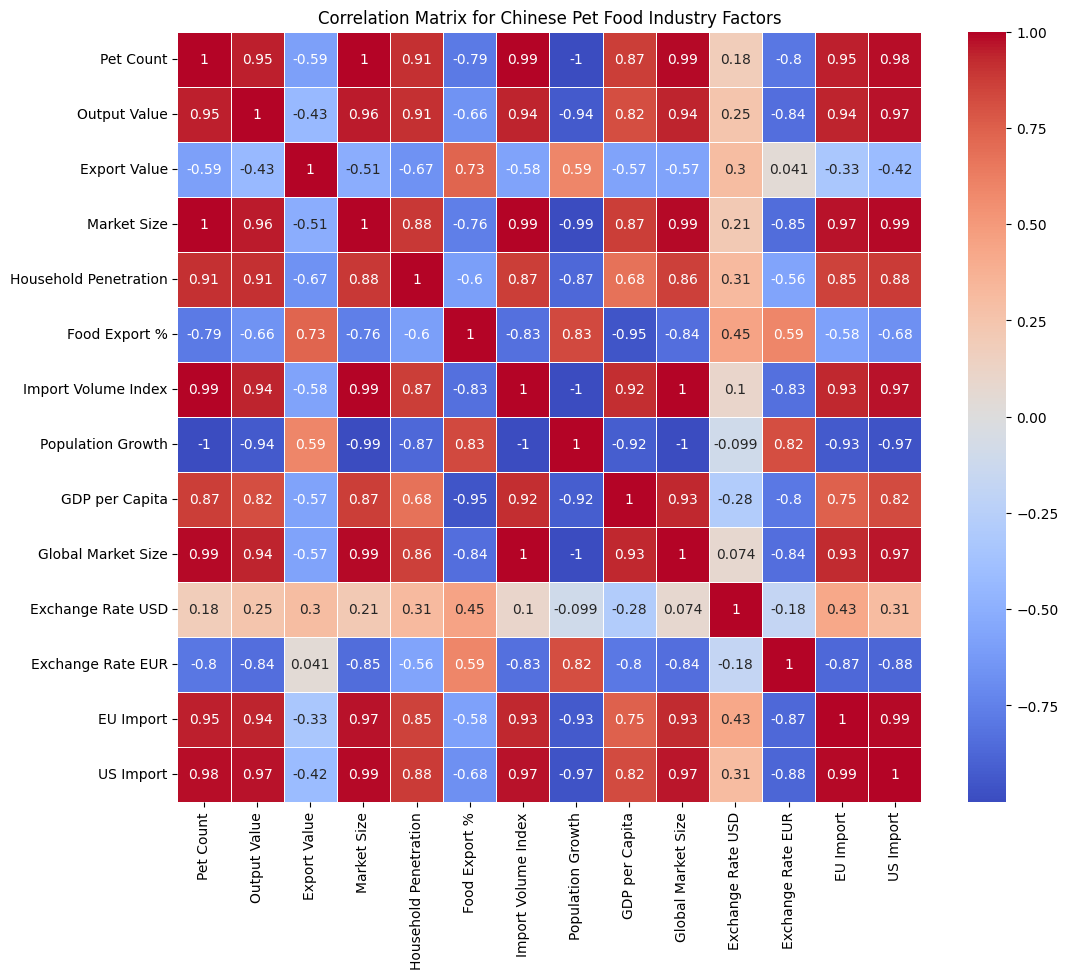


Factors Correlated with Pet Food Output Value:
Output Value             1.000000
US Import                0.970625
Market Size              0.955426
Pet Count                0.945365
EU Import                0.943679
Import Volume Index      0.942053
Global Market Size       0.938685
Household Penetration    0.908976
GDP per Capita           0.819681
Exchange Rate USD        0.246124
Export Value            -0.433182
Food Export %           -0.658953
Exchange Rate EUR       -0.840969
Population Growth       -0.936126
Name: Output Value, dtype: float64

Factors Correlated with Pet Food Export Value:
Export Value             1.000000
Food Export %            0.732248
Population Growth        0.590686
Exchange Rate USD        0.297583
Exchange Rate EUR        0.041331
EU Import               -0.329116
US Import               -0.416956
Output Value            -0.433182
Market Size             -0.511218
GDP per Capita          -0.571555
Global Market Size      -0.574386
Import Volume Index

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Definition
years = np.array([2019, 2020, 2021, 2022, 2023])

# Data indicators
pet_count = np.array([99.8, 108.5, 115.4, 122.6, 130.2])  # Pet count (million)
pet_food_output_value = np.array([440.7, 727.3, 1554, 1508, 2793])  # Total pet food production value (CNY billion)
pet_food_export_value = np.array([154.1, 9.8, 12.2, 24.7, 39.6])  # Total pet food export value (USD billion)
market_size = np.array([33.2, 35.6, 38.9, 42.1, 45.5])  # Pet market size (USD billion)
pet_household_penetration = np.array([0.18, 0.2, 0.2, 0.2, 0.22])  # Pet household penetration rate
food_export_percentage = np.array([2.8745, 2.6897, 2.3228, 2.3002, 2.4563])  # Food export percentage of goods
import_volume_index = np.array([120.23, 126.07, 134.64, 139.98, 145.32])  # Import volume index
population_growth = np.array([0.3547, 0.2380, 0.0893, -0.0131, -0.1038])  # Population growth rate (annual %)
gdp_per_capita = np.array([10143.86, 10408.72, 12617.51, 12662.58, 12614.06])  # GDP per capita (USD)
global_market_size = np.array([1000, 1055, 1149.42, 1200, 1250])  # Global market size (USD billion)
exchange_rate_usd = np.array([6.9, 6.9, 6.45, 6.75, 7.12])  # Exchange rate (USD/CNY)
exchange_rate_eur = np.array([7.75, 8.02, 7.65, 7.5, 7.34])  # Exchange rate (EUR/CNY)
eu_pet_food_import = np.array([20.5, 21, 22, 24.4, 27.2])  # EU pet food import (EUR billion)
us_pet_food_import = np.array([15.3, 16, 17.5, 19, 21.3])  # US pet food import (USD billion)

# Create a DataFrame for easier manipulation
data = {
    'Pet Count': pet_count,
    'Output Value': pet_food_output_value,
    'Export Value': pet_food_export_value,
    'Market Size': market_size,
    'Household Penetration': pet_household_penetration,
    'Food Export %': food_export_percentage,
    'Import Volume Index': import_volume_index,
    'Population Growth': population_growth,
    'GDP per Capita': gdp_per_capita,
    'Global Market Size': global_market_size,
    'Exchange Rate USD': exchange_rate_usd,
    'Exchange Rate EUR': exchange_rate_eur,
    'EU Import': eu_pet_food_import,
    'US Import': us_pet_food_import
}
df = pd.DataFrame(data)

# 2. Correlation Analysis
corr_matrix = df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# 3. Visualize Correlation Matrix with Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Chinese Pet Food Industry Factors')
plt.show()

# 4. Analysis and Summary
# Finding factors most correlated with Pet Food Output and Export Values
corr_with_output = corr_matrix['Output Value']
corr_with_export = corr_matrix['Export Value']

# Output results
print("\nFactors Correlated with Pet Food Output Value:")
print(corr_with_output.sort_values(ascending=False))

print("\nFactors Correlated with Pet Food Export Value:")
print(corr_with_export.sort_values(ascending=False))


# Question 4 关税对于中国宠物产业的影响
这里的影响主要从出口量上面来讨论，题目中主要提到了来自european countries和美国的关税政策，所以这里我们分类讨论，将关税和汇率分为三种情况来预测未来三年的出口量。
将国际政策对一个国家的出口贸易影响分类时，结合 **汇率** 和 **关税** 两个因素，可以划分为以下三种情况：  

---

### **1. 有利于出口贸易的国际政策**
- **汇率方面**：  
  政策促使本国货币贬值（对外币贬值），从而使出口商品价格在国际市场上更具竞争力。  
  例如：通过央行干预降低汇率，或外部国家货币升值带来的间接影响。

- **关税方面**：  
  他国降低对本国商品的进口关税，或通过双边/多边贸易协定享受零关税待遇。  
  例如：区域经济一体化、自由贸易协定（如 RCEP）。

---

### **2. 抑制出口贸易的国际政策**
- **汇率方面**：  
  政策导致本国货币升值，使得出口商品价格更高，削弱国际市场竞争力。  
  例如：外汇管制放松或资本流入增加导致本币升值。

- **关税方面**：  
  他国提高对本国出口商品的进口关税，增加出口商品的成本，降低需求。  
  例如：贸易保护主义政策、反倾销税等。

---

### **3. 中性或间接影响的国际政策**
- **汇率方面**：  
  汇率保持相对稳定，政策对出口价格的直接影响较小，但可能通过其他经济途径（如跨国投资、金融政策）间接影响贸易。  
  例如：汇率稳定在合理区间时，出口贸易依赖于其他因素，如产业结构或产品竞争力。

- **关税方面**：  
  无明显的关税变化，但可能涉及非关税壁垒（如技术标准、检验检疫）对出口的间接影响。  
  例如：通过贸易协定消除关税但提高技术性贸易壁垒。

---

这三种分类方式有助于系统化地分析国际政策对出口贸易的不同情景下的影响，便于制定应对策略。

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA

# 1. Data Definition
years = np.array([2019, 2020, 2021, 2022, 2023])
# Data indicators
pet_count = np.array([99.8, 108.5, 115.4, 122.6, 130.2])  # Pet count (million)
pet_food_output_value = np.array([440.7, 727.3, 1554, 1508, 2793])  # Total pet food production value (CNY billion)
pet_food_export_value = np.array([154.1, 9.8, 12.2, 24.7, 39.6])  # Total pet food export value (USD billion)
market_size = np.array([33.2, 35.6, 38.9, 42.1, 45.5])  # Pet market size (USD billion)
pet_household_penetration = np.array([0.18, 0.2, 0.2, 0.2, 0.22])  # Pet household penetration rate
food_export_percentage = np.array([2.8745, 2.6897, 2.3228, 2.3002, 2.4563])  # Food export percentage of goods
import_volume_index = np.array([120.23, 126.07, 134.64, 139.98, 145.32])  # Import volume index
population_growth = np.array([0.3547, 0.2380, 0.0893, -0.0131, -0.1038])  # Population growth rate (annual %)
gdp_per_capita = np.array([10143.86, 10408.72, 12617.51, 12662.58, 12614.06])  # GDP per capita (USD)
global_market_size = np.array([1000, 1055, 1149.42, 1200, 1250])  # Global market size (USD billion)
exchange_rate_usd = np.array([6.9, 6.9, 6.45, 6.75, 7.12])  # Exchange rate (USD/CNY)
us_pet_food_import = np.array([15.3, 16, 17.5, 19, 21.3])  # US pet food import (USD billion)
tarrif_usa_addition = np.array([0.25, 0.25, 0.25, 0.25, 0.25])# 美国对中国加征关税（25%）
tarrif_eu_addition = np.array([0, 0, 0, 0, 0])# 欧盟对中国加征关税（无）

# 2. Construct Models
# Extract features related to export
X_export = np.column_stack((pet_count, food_export_percentage, population_growth, exchange_rate_usd, us_pet_food_import, tarrif_usa_addition))

# Scale the features
scaler = StandardScaler()
X_export_scaled = scaler.fit_transform(X_export)

# Fit SVR model
svr_export_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_export_model.fit(X_export_scaled, pet_food_export_value)

# Fit Random Forest Regressor model
rf_export_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_export_model.fit(X_export_scaled, pet_food_export_value)

# Fit Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_export_scaled, pet_food_export_value)

# Fit ARIMA model for time series prediction
arima_model = ARIMA(pet_food_export_value, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

from sklearn.ensemble import GradientBoostingRegressor

# Fit Gradient Boosting Regressor model
gbr_export_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
gbr_export_model.fit(X_export_scaled, pet_food_export_value)

from xgboost import XGBRegressor

# Fit XGBoost Regressor model
xgb_export_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
xgb_export_model.fit(X_export_scaled, pet_food_export_value)

from lightgbm import LGBMRegressor

# Fit LightGBM Regressor model
lgbm_export_model = LGBMRegressor(n_estimators=200, learning_rate=0.05, max_depth=-1, random_state=42)
lgbm_export_model.fit(X_export_scaled, pet_food_export_value)

from catboost import CatBoostRegressor

# Fit CatBoost Regressor model
catboost_export_model = CatBoostRegressor(iterations=300, learning_rate=0.05, depth=6, random_seed=42, verbose=0)
catboost_export_model.fit(X_export_scaled, pet_food_export_value)




d:\Users\epiph\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 48.080001
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

## 首先是选择国际政策，分为有利，不利，不变三种情况

In [85]:
years_future = np.array([2024, 2025, 2026, 2027])  # Future four years
pet_future = np.array([137.77,145.26,152.75, 160.24])  # Future pet count (million)
def select_different_policy(policies):
    # 根据政策选择不同的模型
    if policies == 'profit':
        # 3. Predict future values for population growth rate, exchange rate, and US import volume
        pop_growth_rate_future = np.array([-0.12, -0.15, -0.18, -0.20])  # Future four years population growth rate
        exchange_rate_usd_future = exchange_rate_usd[-1] * (1 + 0.02) ** np.arange(1, 5)  # Exchange rate (USD/CNY) assuming 2% annual growth
        us_pet_food_import_future = us_pet_food_import[-1] * (1 + 0.03) ** np.arange(1, 5)  # US pet food import volume assuming 3% annual growth
        food_export_percentage_future = food_export_percentage[-1] * (1 + 0.05) ** np.arange(1, 5)  # Food export percentage assuming 5% annual growth
        tarrif_usa_addition_future = tarrif_usa_addition[-1] * (1 - 0.05) ** np.arange(1, 5)  # 美国对中国加征关税（25%）每年5%减小
        tarrif_eu_addition_future = tarrif_eu_addition[-1] * (1) ** np.arange(1, 5)  # 欧盟对中国加征关税（无）
        return pop_growth_rate_future, exchange_rate_usd_future, us_pet_food_import_future, food_export_percentage_future, tarrif_usa_addition_future, tarrif_eu_addition_future
    elif policies == 'restrain':
        # 3. Predict future values for population growth rate, exchange rate, and US import volume
        pop_growth_rate_future = np.array([-0.12, -0.15, -0.18, -0.20])  # Future four years population growth rate
        exchange_rate_usd_future = exchange_rate_usd[-1] * (1 - 0.02) ** np.arange(1, 5)  # Exchange rate (USD/CNY) assuming 2% annual growth
        us_pet_food_import_future = us_pet_food_import[-1] * (1 + 0.03) ** np.arange(1, 5)  # US pet food import volume assuming 3% annual growth
        food_export_percentage_future = food_export_percentage[-1] * (1 - 0.01) ** np.arange(1, 5)  # Food export percentage assuming 1% annual growth
        tarrif_usa_addition_future = tarrif_usa_addition[-1] * (1 + 0.02) ** np.arange(1, 5)  # 美国对中国加征关税（25%）每年2%增长
        tarrif_eu_addition_future = tarrif_eu_addition[-1] * (1 + 0.01) ** np.arange(1, 5)  # 欧盟对中国加征关税（无）每年1%增长
        return pop_growth_rate_future, exchange_rate_usd_future, us_pet_food_import_future, food_export_percentage_future, tarrif_usa_addition_future, tarrif_eu_addition_future
    elif policies =='maintain':
        # 3. Predict future values for population growth rate, exchange rate, and US import volume
        pop_growth_rate_future = np.array([-0.12, -0.15, -0.18, -0.20])  # Future four years population growth rate
        exchange_rate_usd_future = exchange_rate_usd[-1] * (1) ** np.arange(1, 5)  # Exchange rate (USD/CNY) assuming 2% annual growth
        us_pet_food_import_future = us_pet_food_import[-1] * (1+0.01) ** np.arange(1, 5)  # US pet food import volume assuming 3% annual growth
        food_export_percentage_future = food_export_percentage[-1] * (1+0.02) ** np.arange(1, 5)  # Food export percentage assuming 1% annual growth
        tarrif_usa_addition_future = tarrif_usa_addition[-1] * (1) ** np.arange(1, 5)  # 美国对中国加征关税（25%）每年不变
        tarrif_eu_addition_future = tarrif_eu_addition[-1] * (1) ** np.arange(1, 5)  # 欧盟对中国加征关税（无）每年不变
        return pop_growth_rate_future, exchange_rate_usd_future, us_pet_food_import_future, food_export_percentage_future, tarrif_usa_addition_future, tarrif_eu_addition_future

# 这里选择政策，一共三种







# 首先是有利政策

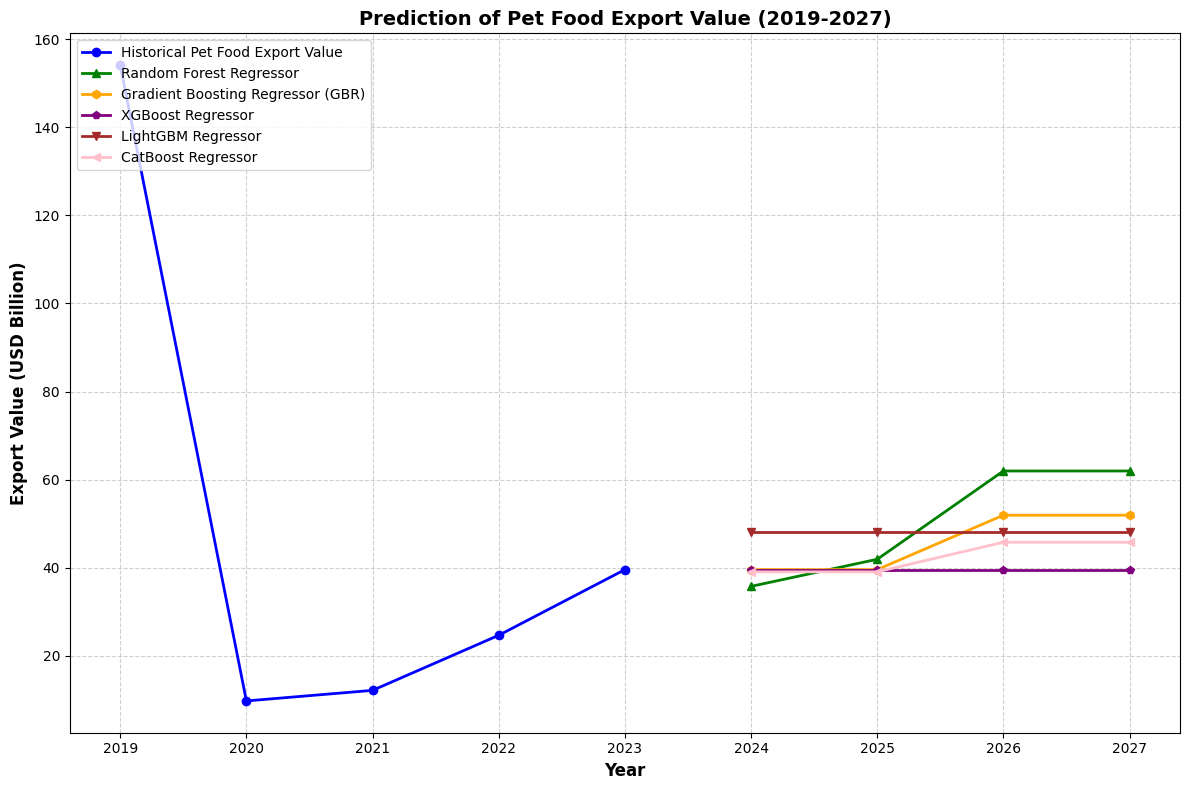

Forecast of Pet Food Export Value in China for the next four years:
2024:
  SVR: 41.59 USD Billion
  Random Forest: 35.80 USD Billion
  Linear Regression: -200.14 USD Billion
  ARIMA: 49.99 USD Billion
2025:
  SVR: 42.27 USD Billion
  Random Forest: 41.95 USD Billion
  Linear Regression: -440.53 USD Billion
  ARIMA: 56.53 USD Billion
2026:
  SVR: 42.27 USD Billion
  Random Forest: 61.99 USD Billion
  Linear Regression: -681.50 USD Billion
  ARIMA: 60.64 USD Billion
2027:
  SVR: 42.17 USD Billion
  Random Forest: 61.99 USD Billion
  Linear Regression: -920.83 USD Billion
  ARIMA: 63.22 USD Billion


In [86]:
pop_growth_rate_future, exchange_rate_usd_future, us_pet_food_import_future, food_export_percentage_future, tarrif_usa_addition_future, tarrif_eu_addition_future=select_different_policy('profit')
# Future features matrix
gdp_future_features = np.column_stack((pet_future, food_export_percentage_future, pop_growth_rate_future, exchange_rate_usd_future, us_pet_food_import_future, tarrif_usa_addition_future))

# Scale the future features
gdp_future_features_scaled = scaler.transform(gdp_future_features)

# 4. Use Models to predict future pet food export values
# SVR Prediction
pet_food_export_value_svr_future = svr_export_model.predict(gdp_future_features_scaled)

# Random Forest Prediction
pet_food_export_value_rf_future = rf_export_model.predict(gdp_future_features_scaled)

# Linear Regression Prediction
pet_food_export_value_lr_future = linear_regression_model.predict(gdp_future_features_scaled)

# ARIMA Prediction
pet_food_export_value_arima_future = arima_model_fit.forecast(steps=4)

# Gradient Boosting Regressor
pet_food_export_value_gbr_future = gbr_export_model.predict(gdp_future_features_scaled)

# XGBoost Regressor
pet_food_export_value_xgb_future = xgb_export_model.predict(gdp_future_features_scaled)

# LightGBM Regressor model
pet_food_export_value_lgb_future = lgbm_export_model.predict(gdp_future_features_scaled)

# CatBoost Regressor
pet_food_export_value_catboost_future = catboost_export_model.predict(gdp_future_features_scaled)

# Visualization of prediction results
plt.figure(figsize=(12, 8))

# Historical Pet Food Export Value
plt.plot(years, pet_food_export_value, '-o', label='Historical Pet Food Export Value', linewidth=2, markersize=6, color='b')

# SVR prediction
# plt.plot(years_future, pet_food_export_value_svr_future, '-s', label='Support Vector Regression (SVR)', linewidth=2, markersize=6, color='r')

# Random Forest prediction
plt.plot(years_future, pet_food_export_value_rf_future, '-^', label='Random Forest Regressor', linewidth=2, markersize=6, color='g')

# Linear Regression prediction
# plt.plot(years_future, pet_food_export_value_lr_future, '-d', label='Linear Regression', linewidth=2, markersize=6, color='m')# 有问题，不用这个了

# ARIMA prediction
# plt.plot(years_future, pet_food_export_value_arima_future, '-x', label='ARIMA', linewidth=2, markersize=6, color='c') # 变化不大，这里也不用了

# Gradient Boosting Regressor prediction
plt.plot(years_future, pet_food_export_value_gbr_future, '-h', label='Gradient Boosting Regressor (GBR)', linewidth=2, markersize=6, color='orange')

# XGBoost Regressor prediction
plt.plot(years_future, pet_food_export_value_xgb_future, '-p', label='XGBoost Regressor', linewidth=2, markersize=6, color='purple')

# LightGBM Regressor prediction
plt.plot(years_future, pet_food_export_value_lgb_future, '-v', label='LightGBM Regressor', linewidth=2, markersize=6, color='brown')

# CatBoost Regressor prediction
plt.plot(years_future, pet_food_export_value_catboost_future, '-<', label='CatBoost Regressor', linewidth=2, markersize=6, color='pink')

# Plot settings
plt.title('Prediction of Pet Food Export Value (2019-2027)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Export Value (USD Billion)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print forecast results
print('Forecast of Pet Food Export Value in China for the next four years:')
for i in range(len(years_future)):
    print(f'{years_future[i]}:')
    print(f'  SVR: {pet_food_export_value_svr_future[i]:.2f} USD Billion')
    print(f'  Random Forest: {pet_food_export_value_rf_future[i]:.2f} USD Billion')
    print(f'  Linear Regression: {pet_food_export_value_lr_future[i]:.2f} USD Billion')
    print(f'  ARIMA: {pet_food_export_value_arima_future[i]:.2f} USD Billion')

# 其次是不利政策

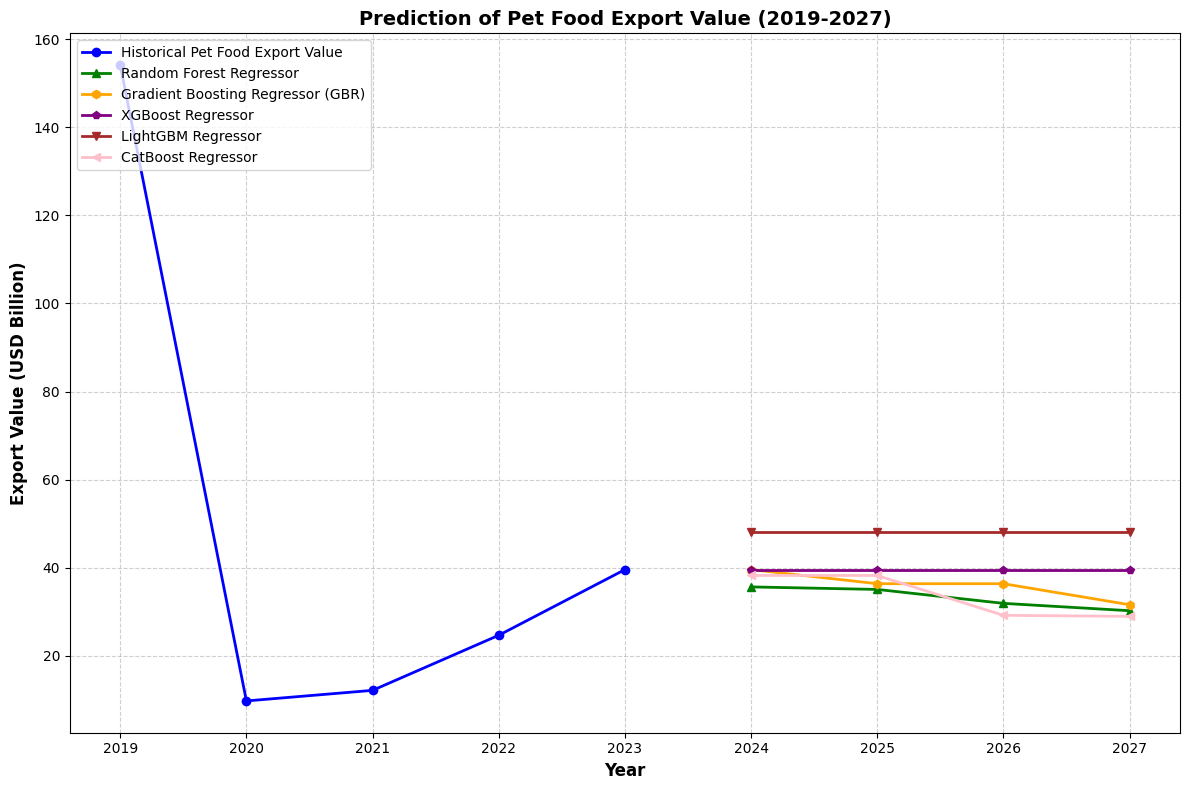

Forecast of Pet Food Export Value in China for the next four years:
2024:
  SVR: 43.25 USD Billion
  Random Forest: 35.68 USD Billion
  Linear Regression: -193.52 USD Billion
  ARIMA: 49.99 USD Billion
2025:
  SVR: 45.10 USD Billion
  Random Forest: 35.10 USD Billion
  Linear Regression: -423.51 USD Billion
  ARIMA: 56.53 USD Billion
2026:
  SVR: 44.87 USD Billion
  Random Forest: 31.94 USD Billion
  Linear Regression: -650.13 USD Billion
  ARIMA: 60.64 USD Billion
2027:
  SVR: 43.82 USD Billion
  Random Forest: 30.27 USD Billion
  Linear Regression: -870.99 USD Billion
  ARIMA: 63.22 USD Billion


In [87]:
pop_growth_rate_future, exchange_rate_usd_future, us_pet_food_import_future, food_export_percentage_future, tarrif_usa_addition_future, tarrif_eu_addition_future=select_different_policy('restrain')
# Future features matrix
gdp_future_features = np.column_stack((pet_future, food_export_percentage_future, pop_growth_rate_future, exchange_rate_usd_future, us_pet_food_import_future, tarrif_usa_addition_future))

# Scale the future features
gdp_future_features_scaled = scaler.transform(gdp_future_features)

# 4. Use Models to predict future pet food export values
# SVR Prediction
pet_food_export_value_svr_future = svr_export_model.predict(gdp_future_features_scaled)

# Random Forest Prediction
pet_food_export_value_rf_future = rf_export_model.predict(gdp_future_features_scaled)

# Linear Regression Prediction
pet_food_export_value_lr_future = linear_regression_model.predict(gdp_future_features_scaled)

# ARIMA Prediction
pet_food_export_value_arima_future = arima_model_fit.forecast(steps=4)

# Gradient Boosting Regressor
pet_food_export_value_gbr_future = gbr_export_model.predict(gdp_future_features_scaled)

# XGBoost Regressor
pet_food_export_value_xgb_future = xgb_export_model.predict(gdp_future_features_scaled)

# LightGBM Regressor model
pet_food_export_value_lgb_future = lgbm_export_model.predict(gdp_future_features_scaled)

# CatBoost Regressor
pet_food_export_value_catboost_future = catboost_export_model.predict(gdp_future_features_scaled)

# Visualization of prediction results
plt.figure(figsize=(12, 8))

# Historical Pet Food Export Value
plt.plot(years, pet_food_export_value, '-o', label='Historical Pet Food Export Value', linewidth=2, markersize=6, color='b')

# SVR prediction
# plt.plot(years_future, pet_food_export_value_svr_future, '-s', label='Support Vector Regression (SVR)', linewidth=2, markersize=6, color='r')

# Random Forest prediction
plt.plot(years_future, pet_food_export_value_rf_future, '-^', label='Random Forest Regressor', linewidth=2, markersize=6, color='g')

# Linear Regression prediction
# plt.plot(years_future, pet_food_export_value_lr_future, '-d', label='Linear Regression', linewidth=2, markersize=6, color='m')# 有问题，不用这个了

# ARIMA prediction
# plt.plot(years_future, pet_food_export_value_arima_future, '-x', label='ARIMA', linewidth=2, markersize=6, color='c') # 变化不大，这里也不用了

# Gradient Boosting Regressor prediction
plt.plot(years_future, pet_food_export_value_gbr_future, '-h', label='Gradient Boosting Regressor (GBR)', linewidth=2, markersize=6, color='orange')

# XGBoost Regressor prediction
plt.plot(years_future, pet_food_export_value_xgb_future, '-p', label='XGBoost Regressor', linewidth=2, markersize=6, color='purple')

# LightGBM Regressor prediction
plt.plot(years_future, pet_food_export_value_lgb_future, '-v', label='LightGBM Regressor', linewidth=2, markersize=6, color='brown')

# CatBoost Regressor prediction
plt.plot(years_future, pet_food_export_value_catboost_future, '-<', label='CatBoost Regressor', linewidth=2, markersize=6, color='pink')

# Plot settings
plt.title('Prediction of Pet Food Export Value (2019-2027)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Export Value (USD Billion)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print forecast results
print('Forecast of Pet Food Export Value in China for the next four years:')
for i in range(len(years_future)):
    print(f'{years_future[i]}:')
    print(f'  SVR: {pet_food_export_value_svr_future[i]:.2f} USD Billion')
    print(f'  Random Forest: {pet_food_export_value_rf_future[i]:.2f} USD Billion')
    print(f'  Linear Regression: {pet_food_export_value_lr_future[i]:.2f} USD Billion')
    print(f'  ARIMA: {pet_food_export_value_arima_future[i]:.2f} USD Billion')

# 其次是政策保持不变

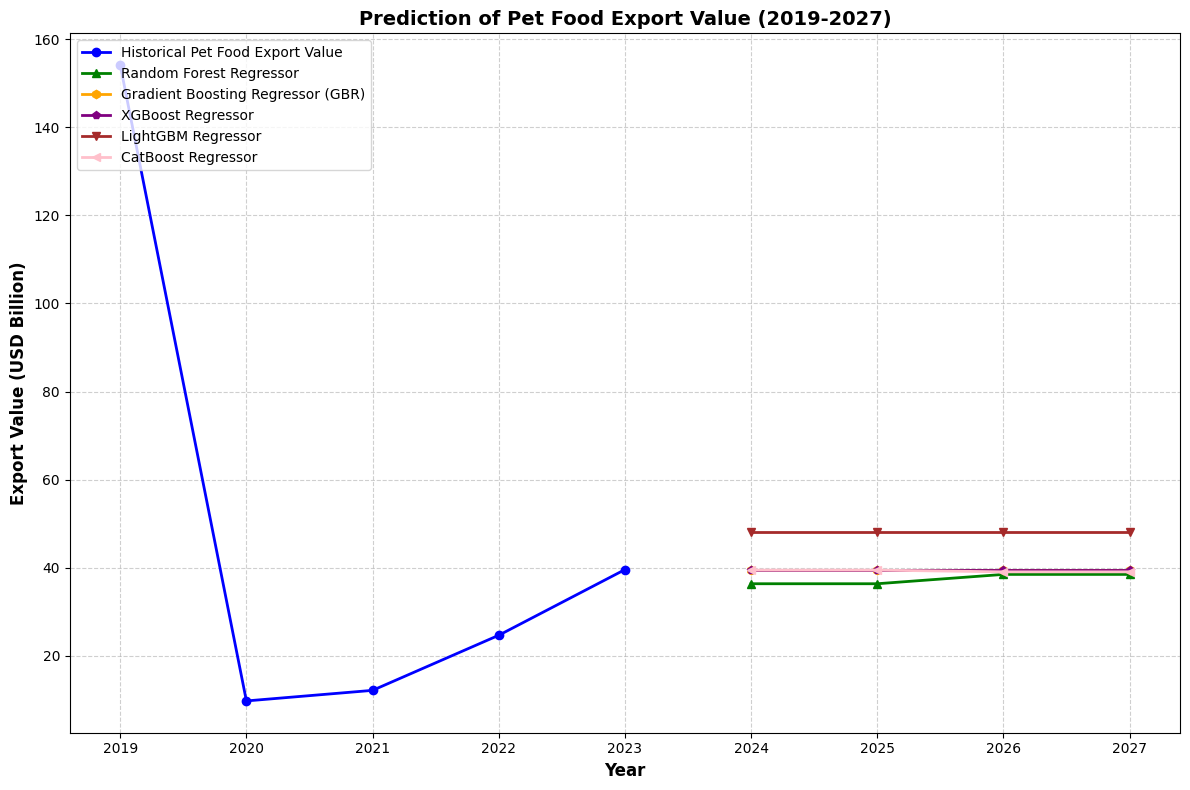

Forecast of Pet Food Export Value in China for the next four years:
2024:
  SVR: 41.81 USD Billion
  Random Forest: 36.40 USD Billion
  Linear Regression: -254.32 USD Billion
  ARIMA: 49.99 USD Billion
2025:
  SVR: 43.19 USD Billion
  Random Forest: 36.40 USD Billion
  Linear Regression: -548.77 USD Billion
  ARIMA: 56.53 USD Billion
2026:
  SVR: 43.51 USD Billion
  Random Forest: 38.51 USD Billion
  Linear Regression: -843.56 USD Billion
  ARIMA: 60.64 USD Billion
2027:
  SVR: 43.23 USD Billion
  Random Forest: 38.51 USD Billion
  Linear Regression: -1136.40 USD Billion
  ARIMA: 63.22 USD Billion


In [88]:
pop_growth_rate_future, exchange_rate_usd_future, us_pet_food_import_future, food_export_percentage_future, tarrif_usa_addition_future, tarrif_eu_addition_future=select_different_policy('maintain')
# Future features matrix
gdp_future_features = np.column_stack((pet_future, food_export_percentage_future, pop_growth_rate_future, exchange_rate_usd_future, us_pet_food_import_future, tarrif_usa_addition_future))

# Scale the future features
gdp_future_features_scaled = scaler.transform(gdp_future_features)

# 4. Use Models to predict future pet food export values
# SVR Prediction
pet_food_export_value_svr_future = svr_export_model.predict(gdp_future_features_scaled)

# Random Forest Prediction
pet_food_export_value_rf_future = rf_export_model.predict(gdp_future_features_scaled)

# Linear Regression Prediction
pet_food_export_value_lr_future = linear_regression_model.predict(gdp_future_features_scaled)

# ARIMA Prediction
pet_food_export_value_arima_future = arima_model_fit.forecast(steps=4)

# Gradient Boosting Regressor
pet_food_export_value_gbr_future = gbr_export_model.predict(gdp_future_features_scaled)

# XGBoost Regressor
pet_food_export_value_xgb_future = xgb_export_model.predict(gdp_future_features_scaled)

# LightGBM Regressor model
pet_food_export_value_lgb_future = lgbm_export_model.predict(gdp_future_features_scaled)

# CatBoost Regressor
pet_food_export_value_catboost_future = catboost_export_model.predict(gdp_future_features_scaled)

# Visualization of prediction results
plt.figure(figsize=(12, 8))

# Historical Pet Food Export Value
plt.plot(years, pet_food_export_value, '-o', label='Historical Pet Food Export Value', linewidth=2, markersize=6, color='b')

# SVR prediction
# plt.plot(years_future, pet_food_export_value_svr_future, '-s', label='Support Vector Regression (SVR)', linewidth=2, markersize=6, color='r')

# Random Forest prediction
plt.plot(years_future, pet_food_export_value_rf_future, '-^', label='Random Forest Regressor', linewidth=2, markersize=6, color='g')

# Linear Regression prediction
# plt.plot(years_future, pet_food_export_value_lr_future, '-d', label='Linear Regression', linewidth=2, markersize=6, color='m')# 有问题，不用这个了

# ARIMA prediction
# plt.plot(years_future, pet_food_export_value_arima_future, '-x', label='ARIMA', linewidth=2, markersize=6, color='c') # 变化不大，这里也不用了

# Gradient Boosting Regressor prediction
plt.plot(years_future, pet_food_export_value_gbr_future, '-h', label='Gradient Boosting Regressor (GBR)', linewidth=2, markersize=6, color='orange')

# XGBoost Regressor prediction
plt.plot(years_future, pet_food_export_value_xgb_future, '-p', label='XGBoost Regressor', linewidth=2, markersize=6, color='purple')

# LightGBM Regressor prediction
plt.plot(years_future, pet_food_export_value_lgb_future, '-v', label='LightGBM Regressor', linewidth=2, markersize=6, color='brown')

# CatBoost Regressor prediction
plt.plot(years_future, pet_food_export_value_catboost_future, '-<', label='CatBoost Regressor', linewidth=2, markersize=6, color='pink')

# Plot settings
plt.title('Prediction of Pet Food Export Value (2019-2027)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Export Value (USD Billion)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print forecast results
print('Forecast of Pet Food Export Value in China for the next four years:')
for i in range(len(years_future)):
    print(f'{years_future[i]}:')
    print(f'  SVR: {pet_food_export_value_svr_future[i]:.2f} USD Billion')
    print(f'  Random Forest: {pet_food_export_value_rf_future[i]:.2f} USD Billion')
    print(f'  Linear Regression: {pet_food_export_value_lr_future[i]:.2f} USD Billion')
    print(f'  ARIMA: {pet_food_export_value_arima_future[i]:.2f} USD Billion')